In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from pathlib import Path
from enzyme.scripts.config import get_config
from enzyme import PRJ_ROOT

In [3]:
from enzyme import *
from enzyme.src.main.run_simulation import run_simulation; import torch; 
from enzyme.src.network.Actor_Critic import Actor_Critic; 
from enzyme.src.mouse_task.mouse_task import mouse_task_ as mouse_task;

import numpy as np
import matplotlib.pyplot as plt
from enzyme.scripts.plot_config import *
from enzyme.scripts.plotters import *

In [4]:
from enzyme.src.mouse_task.get_data import get_data
plotting_data = get_data(name = "large_100_batch_3")

loading data...


In [5]:
batch_num = 10

net_name = "trained_LSTM"
#net_name = "bayes_agent_and_trained_LSTM_representation"
#net_name = "trained_LSTM_soft"
bayes_DV = plotting_data[net_name]["bayes_DV_mu"]
bayes_DV_PM = plotting_data[net_name]["bayes_DV_RMS"]
flow_belief_flat = plotting_data[net_name]["bayes_state_estimate"]

# decoded from STM 
#net_DV = plotting_data[net_name]["net_DV_est_mu"]
net_DV = plotting_data[net_name]["net_DV_mu"]

SAFE_state = plotting_data[net_name]["step_SAFE_STATE_CV"]
net_belief_flat = plotting_data[net_name]["net_state_estimate_CV"]
x_cue = plotting_data[net_name]["step_stim_CV"]



bayes_mu = plotting_data[net_name]["bayes_PGO_estimate"] 
bayes_var = bayes_mu * 0
net_mu = plotting_data[net_name]["net_PGO_estimate_CV"] 
net_var = net_mu * 0
theta_gt = plotting_data[net_name]["theta_flat"] 
plant_A_est = plotting_data["trained_LSTM_planted"]["plantA_net_safe_est"]
plant_B_est = plotting_data["trained_LSTM_planted"]["plantB_net_safe_est"]
plant_A_est_by =  plotting_data["trained_LSTM_planted"]["plantA_bayes_safe_est"] 
plant_B_est_by =  plotting_data["trained_LSTM_planted"]["plantB_bayes_safe_est"]
x_cue_A = plotting_data["trained_LSTM_planted"]["plantA_GOs"]
x_cue_B = plotting_data["trained_LSTM_planted"]["plantB_GOs"]
SAFE_state = plotting_data["trained_LSTM_planted"]["step_SAFE_STATE_CV"]



# decoded from PC
"""
#net_DV = plotting_data[net_name]["PC_to_DV_est_mu"]
net_DV = plotting_data[net_name]["PC_to_net_DV_mu"]

SAFE_state = plotting_data[net_name]["PC_safe"]
flow_belief_flat = plotting_data[net_name]["PC_bayes_state"]
net_belief_flat = plotting_data[net_name]["PC_to_state"]
x_cue = plotting_data[net_name]["PC_input"]
bayes_mu = plotting_data[net_name]["PC_bayes_PGO"] 
bayes_var = bayes_mu * 0
net_mu = plotting_data[net_name]["PC_to_PGO"] 
net_var = net_mu * 0
theta_gt = plotting_data[net_name]["PC_PGO"] 
plant_A_est = plotting_data["trained_LSTM_planted"]["PC_plantA_net_safe_est"]
plant_B_est = plotting_data["trained_LSTM_planted"]["PC_plantB_net_safe_est"]
"""

# decoded from QDIFF
""" 
net_DV = plotting_data[net_name]["QDIFF_to_DV_est_mu"]
SAFE_state = plotting_data[net_name]["QDIFF_safe"]
flow_belief_flat = plotting_data[net_name]["QDIFF_bayes_state"]
net_belief_flat = plotting_data[net_name]["QDIFF_to_state"]
x_cue = plotting_data[net_name]["QDIFF_input"]
bayes_mu = plotting_data[net_name]["QDIFF_bayes_PGO"] 
bayes_var = bayes_mu * 0
net_mu = plotting_data[net_name]["QDIFF_to_PGO"] 
net_var = net_mu * 0
theta_gt = plotting_data[net_name]["QDIFF_PGO"] 
plant_A_est = plotting_data["trained_LSTM_planted"]["PC_plantA_net_safe_est"]
plant_B_est = plotting_data["trained_LSTM_planted"]["PC_plantB_net_safe_est"]
"""

' \nnet_DV = plotting_data[net_name]["QDIFF_to_DV_est_mu"]\nSAFE_state = plotting_data[net_name]["QDIFF_safe"]\nflow_belief_flat = plotting_data[net_name]["QDIFF_bayes_state"]\nnet_belief_flat = plotting_data[net_name]["QDIFF_to_state"]\nx_cue = plotting_data[net_name]["QDIFF_input"]\nbayes_mu = plotting_data[net_name]["QDIFF_bayes_PGO"] \nbayes_var = bayes_mu * 0\nnet_mu = plotting_data[net_name]["QDIFF_to_PGO"] \nnet_var = net_mu * 0\ntheta_gt = plotting_data[net_name]["QDIFF_PGO"] \nplant_A_est = plotting_data["trained_LSTM_planted"]["PC_plantA_net_safe_est"]\nplant_B_est = plotting_data["trained_LSTM_planted"]["PC_plantB_net_safe_est"]\n'

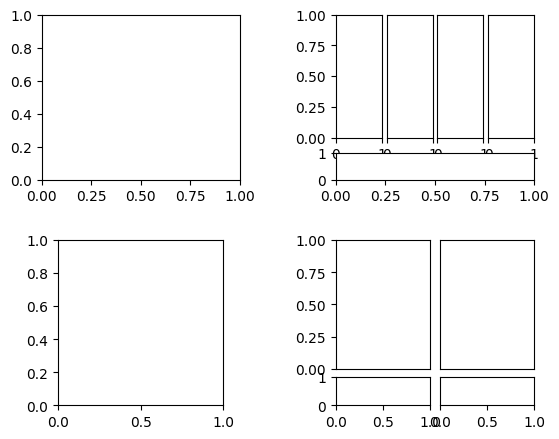

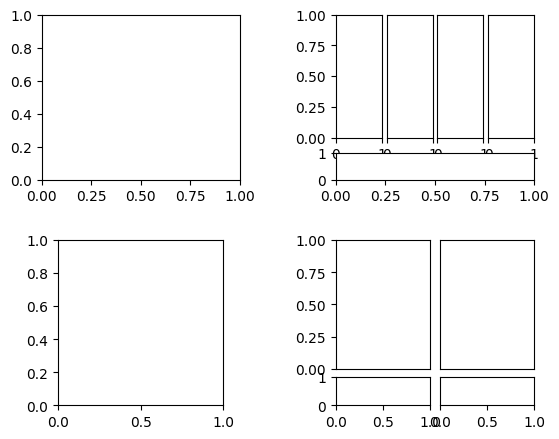

In [6]:
from enzyme.colors import *
from enzyme.src.helper import save_plot
from enzyme.src.helper import mystep
from matplotlib import ticker


SVG = False
errorbar_kwargs = dict(capsize=.5, markeredgecolor="k")


s = 1
w, h = (s*TEXTWIDTH, s*TEXTWIDTH)

plt.close("all")
fig = plt.figure(figsize=(w, h * 0.8), layout="none")
subfigs = fig.subfigures(2, 2, hspace=0.05, wspace=0.15, squeeze=False)

height_ratios = (0.9, 0.2)

axd = dict()

axd_ = subfigs[0, 1].subplot_mosaic(
    """
ABCD
cccc
""",
    gridspec_kw=dict(wspace=0.1, hspace=0.2),
    height_ratios=height_ratios,
)
axd |= axd_

axd_ = subfigs[1, 1].subplot_mosaic(
    """
be
dy
""",
    gridspec_kw=dict(wspace=0.1, hspace=0.1),
    height_ratios=height_ratios,
)
axd |= axd_

axd_ = subfigs[1, 0].subplot_mosaic(
    """z""",
    gridspec_kw=dict(
        wspace=0.2,
        hspace=0.2,
    ),
)
axd |= axd_

axd_ = subfigs[0, 0].subplot_mosaic(
    """0""",
    gridspec_kw=dict(
        wspace=0.2,
        hspace=0.2,
    ),
)
axd |= axd_




ax_theta, ax_thetax, ax_Bs, ax_sx = axd['A'], axd['c'], axd['b'], axd['d']
ax_thetas = [axd[k] for k in 'ABCD']
ax_states = [axd[k] for k in 'be']
ax_xs = [axd[k] for k in 'dy']
ax_PCA = axd['0']

ax_DV = axd['z']
ax_DV.set_box_aspect(1)

for ax in ax_states:
    ax.set_xticks([])

for ax in ax_thetas[1:]:
    ax.spines['left'].set_visible(True)
    ax.spines['right'].set_visible(True)
    # ax.sharey(ax_thetas[0])
    ax.set_yticks([])

for ax in ax_states[1:]:
    ax.spines['left'].set_visible(True)
    ax.spines['right'].set_visible(True)
    # ax.sharey(ax_states[0])
    ax.set_yticks([])

for ax in ax_xs[1:]:
    ax.spines['left'].set_visible(True)
    ax.spines['right'].set_visible(True)
    # ax.sharey(ax_xs[0])
    ax.set_yticks([])


ax_thetas[0].spines['right'].set_visible(True)
ax_thetas[-1].spines['left'].set_visible(True)
ax_thetas[-1].spines['right'].set_visible(True)

ax_states[0].spines['right'].set_visible(True)
ax_states[-1].spines['left'].set_visible(True)
ax_states[-1].spines['right'].set_visible(True)


default_lw = plt.rcParams["lines.linewidth"]
lw_scale = 1.
lw_x = default_lw / 2
fig

fig.set_layout_engine('none')
fig

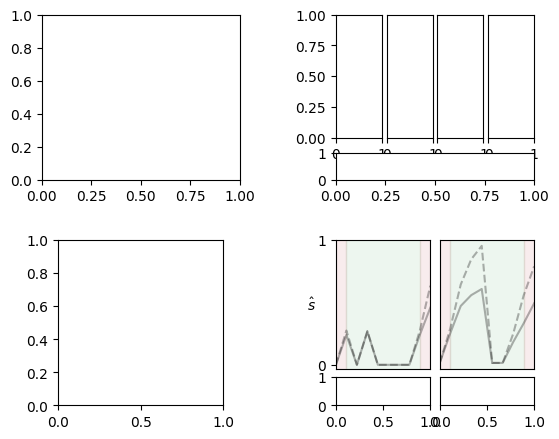

In [7]:
# state belief
plants_net_belief = [plant_A_est, plant_B_est]
plants_bayes_belief = [plant_A_est_by, plant_B_est_by]
transform = lambda x: 1 - np.exp(-x.astype(float))
PGO_show_states = np.arange(1)

PGO_num = plotting_data["trained_LSTM_planted"]["plantA_GOs"].shape[0]

for i_ax, ax in enumerate(ax_states):
    ax.cla()

    handles = []

    From = 0
    Til = 10
    state_changes = np.where(np.diff(SAFE_state) != 0)[0]


    t = np.arange(From, Til)
    s_ = SAFE_state[From:Til]

    trans_s = np.where(np.diff(s_) != 0)[0] + 1
    trans_s = np.concatenate([[0], trans_s, [-1]])

    for i in range(len(trans_s)-1):
        c = c_nogo if s_[trans_s[i]] == 0 else c_go
        ax.axvspan(t[trans_s[i]], t[trans_s[i+1]], color=c, alpha=0.1, zorder=-10)
    # ax.plot(x, sim.PSAFE_flat[s:e], c=c_Bs)

    for p in PGO_show_states:
        for belief, c, l, ls, zorder in zip(
            [plants_bayes_belief[i_ax], plants_net_belief[i_ax]],
            ['k', 'k'],
            [l_bayes, l_nw],
            [ls_bayes, ls_nw],
            [5, 5, 4]
        ):  
            if ls != "-":
                lw = default_lw * lw_scale
            else:
                lw = default_lw
            
            (l,) = ax.plot(t, 
                        transform(belief)[p][From:Til],
                            c=c, ls=ls, lw=lw, alpha=.3, zorder=zorder)
            
            handles.append(l)

    # ax.dataLim.x0 = s
    # ax.dataLim.x1 = e

    # ax_sx.dataLim.x0 = s
    # ax_sx.dataLim.x1 = e

    # ax.autoscale_view()
    # ax_sx.autoscale_view()



    # ax.xaxis.set_major_locator(ticker.FixedLocator(xticks))

    ax.set_xlim(From, Til-1)
    # ax.set_ylim(0, 1)

    # ax.set_xticks(np.linspace(From, Til-1, 4))
    ax.set_xticks([])
    ax.set_yticks([])

ax_Bs.set_yticks([0, 1])
ax_Bs.set_ylabel(r"$\hat s$", rotation=0, va="center")


fig

In [8]:
# # make a textbox to the upper right
# ax_Bs.text(
#     0.95,
#     0.95,
#     rf"$\theta={{{sim.PGO_flat[0 : sim.theta_traj_N][e]:.1f}}}$",
#     horizontalalignment="right",
#     verticalalignment="top",
#     transform=ax_Bs.transAxes,
#     color="k",
# )
# fig

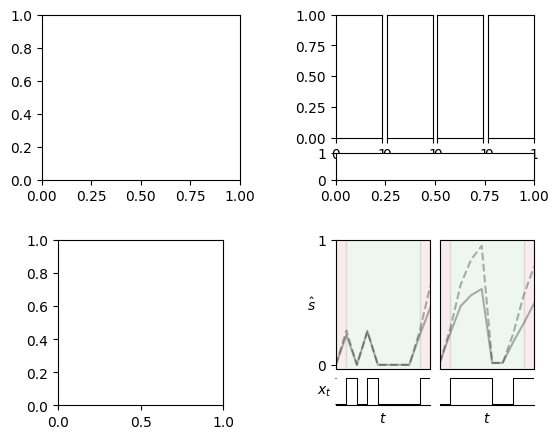

In [9]:
x_cues = [x_cue_A, x_cue_B]
for i_ax, ax in enumerate(ax_xs):
    for p in PGO_show_states:
        ax.cla()

        x_cue = x_cues[i_ax][p]
        # only bottom spine
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)

        # no ticks
        ax.tick_params(axis="y", which="both", length=1)

        # no labels
        ax.set_yticklabels([])

        # ax_sx.xaxis.set_major_locator(ticker.NullLocator())
        # ax_Bs.xaxis.set_major_locator(ticker.NullLocator())

        t = np.arange(From, Til)
        ax.step(t, x_cue[From:Til], where="post", c="k", lw=lw_x, zorder=+2)

        # ax.dataLim.x0 = s
        # ax.dataLim.x1 = e
        # ax.autoscale_view()
        ax.set_xlim(From, Til-1)

        # no major ticks
        # ax.set_xticks([])

        # minor ticks via tick Locator every 5 steps
        # ax.xaxis.set_minor_locator(ticker.MultipleLocator(5))
        # make labels at minor via intformatter
        # ax.xaxis.set_minor_formatter(ticker.ScalarFormatter())

        # ax.xaxis.set_minor_formatter(plt.FuncFormatter(lambda x, pos: np.round(x / tau_s).astype(int)))
        ax.set_xlabel(r"$t$")

        ax.set_xticks(np.linspace(From, Til-1, 4))

        # ax.set_xticks(np.linspace(From, Til-1, 4))
        ax.set_xticks([])
        ax.set_yticks([])

ax_sx.set_yticks([0, 1])
ax_sx.set_ylabel("$x_t$", rotation=0, va="center")

fig

0.1 0.8 56
0.3 0.6 60
0.6 0.3 64
0.8 0.1 60


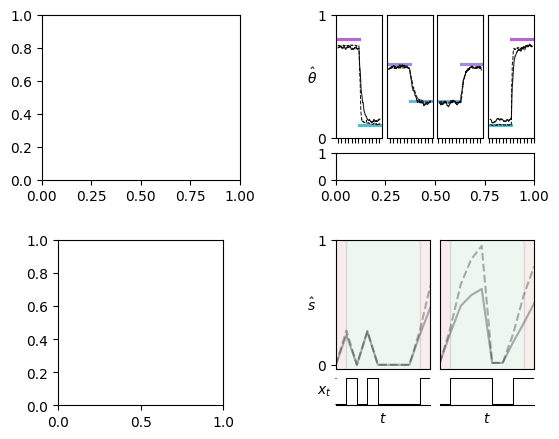

In [10]:

from matplotlib.colors import SymLogNorm
from enzyme.plot_helper import plot_broken, xylabel_to_ticks

# theta belief
ax = ax_theta
ax.cla()

PGOs = PGO_show
From = -200#-100
Til = 200#100
t = np.arange(len(theta_gt))

norm = SymLogNorm(linthresh=1e-3, vmin=0, vmax=1)

bayes_parts = []
net_parts = []
theta_gt_parts = []
t_parts = []
t_switch_parts = []
bayes_vars = []
net_vars = []
theta_vars = []

New = [.1, .3, .6, .8]
Old = [.8, .6, .3, .1]

for i, (new, old) in enumerate(zip(New, Old)):
    bayes_, net_, theta_gt_, t_stitched_ = [[] for _ in range(4)]
    t_switch_ = []
    switches = np.where((np.roll(theta_gt, -1) == new)*(np.roll(theta_gt, 1) == old))[0]
    print(new, old, len(switches))
    
    for switch_point in switches:
        s = switch_point + From
        e = switch_point + Til
        bayes_.append(bayes_mu[s:e])
        net_.append(net_mu[s:e])
        theta_gt_.append(theta_gt[s:e])
        t_stitched_.append(t[s:e])
        t_switch_.append(switch_point)

    # get the mean transition behavior
    bayes_var = np.array(bayes_).var(0)
    bayes_ = np.array(bayes_).mean(0)
    net_var = np.array(net_).var(0)
    net_ = np.array(net_).mean(0)
    theta_gt_ = np.array(theta_gt_).mean(0)
    t_stitched_ = np.array(t_stitched_)[0]
    t_switch_ = np.array(t_switch_)[0]

    # add nan to make transitions discontinuous
    bayes_parts.append(np.concatenate([bayes_,  [np.nan]]))
    net_parts.append(np.concatenate([net_,  [np.nan]]))
    bayes_vars.append(np.concatenate([bayes_var,  [np.nan]]))
    net_vars.append(np.concatenate([net_var,  [np.nan]]))
    theta_vars.append(np.concatenate([net_var*0,  [np.nan]]))

    theta_gt_parts.append(np.concatenate([theta_gt_,  [np.nan]]))
    t_parts.append(np.concatenate([t_stitched_,  [np.nan]]))
    t_switch_parts.append(t_switch_)

bayes_stitched = np.concatenate(bayes_parts)
net_stitched = np.concatenate(net_parts)
bayes_vars_stitched = np.concatenate(bayes_vars)
net_vars_stitched = np.concatenate(net_vars)

theta_gt_stitched = np.concatenate(theta_gt_parts)
t_stitched = np.concatenate(t_parts)
t_compr = np.arange(len(t_stitched))
t_compr_switch = np.arange(0, len(t_stitched), Til - From)

handles = []
alpha_lines = .9
for mu, var, c, l, ls, zorder in zip(
    [bayes_parts, net_parts, theta_gt_parts],
    [bayes_vars, net_vars, theta_vars],  # variances
    ['k', 'k', 'k'],
    [l_bayes, l_nw, r'$\theta_t$'],
    [ls_bayes, ls_nw, '-'],
    [5, 4, -1],
):
    if ls != "-":
        lw = default_lw * lw_scale
    else:
        lw = default_lw

    plot_fn = lambda ax, x, y, **largs: ax.plot(x, y, **largs) if mu is not theta_gt_parts else plot_broken(ax, x, y, **largs)


    for ax, t_part, part, v in zip(ax_thetas, t_parts, mu, var):
        if mu is not theta_gt_parts:
            l, = plot_fn(ax, 
                t_part,
                part,
                alpha=alpha_lines,
                color=c,
                label=l,
                lw=lw / 2,
                linestyle=ls,
                zorder=zorder,
            )
        else:
            for PGO in PGOs:
                part_ = np.where(np.isclose(part, PGO), part, np.nan)
                l, = plot_fn(ax, 
                    t_part,
                    part_,
                    alpha=alpha_lines,
                    color=cmap_cool(PGO),
                    label=l,
                    lw=lw * 1.5,
                    linestyle=ls,
                    zorder=zorder,
                )
        if ax is ax_thetas[0]:        
            handles.append(l)
#        if v[0] > 0:
#            ax.fill_between(t_part, part - v, part + v, alpha = .7, color = 'gray')

# t_switch_stiched_compr = np.array([(Til - From)*(i) for i in range(len(New) + 1)])
# # for t_switch__ in t_switch_stiched_compr:
# #     ax.axvline(t_switch__, c='tab:red', ls='--', lw=1, zorder=-10)

# ax.set_xticks(t_switch_stiched_compr)
# ticklabels = [0, (Til - From)] + [""]*(len(New) - 1)
# ax.set_xticklabels(ticklabels)

for ax_ in ax_thetas:
    # make tick every 33 steps
    ax_.xaxis.set_major_locator(ticker.MultipleLocator(33))

    # no minor labels
    ax_.xaxis.set_major_formatter(plt.NullFormatter())
    ax_.xaxis.set_minor_formatter(plt.NullFormatter())
    ax_.set_ylim(0, 1)

# make subtitle with xlabel size

labelsize = plt.rcParams["axes.labelsize"]
ax_theta.set_ylabel(r"$\hat \theta$", rotation=0, va="center")
ax_theta.set_yticks([0, 1])

# ax.autoscale(False)

# distribution plot
# ax.pcolormesh(
#     xax,
#     y,
#     bayes_theta_dist[:, s:e],
#     norm=norm,
#     cmap=cm_blue,
#     shading="nearest",
#     alpha=.3,
#     snap=False,
#     rasterized=True,
#     zorder=-100,

# )

# # broken markers, https://matplotlib.org/stable/gallery/subplots_axes_and_figures/broken_axis.html
# d = .5 # proportion of vertical to horizontal extent of the slanted line
# kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12/2,
#               linestyle="none", color='k', mec='k', mew=1, clip_on=False)

# for ax_ in ax_thetas[1:-1]:
#     ax_.plot([0, 1], [0, 0], transform=ax_.transAxes, **kwargs)
#     ax_.plot([0, 1], [1, 1], transform=ax_.transAxes, **kwargs)
# ax_thetas[0].plot([1], [0], transform=ax_thetas[0].transAxes, **kwargs)
# ax_thetas[0].plot([1], [1], transform=ax_thetas[0].transAxes, **kwargs)
# ax_thetas[-1].plot([0], [0], transform=ax_thetas[-1].transAxes, **kwargs)
# ax_thetas[-1].plot([0], [1], transform=ax_thetas[-1].transAxes, **kwargs)



fig

In [11]:
""" FOR CHECKING TRANSITIONS """
transitions_from = .9
inds = np.where((theta_gt==transitions_from)*(np.diff(theta_gt, append = 0) != 0))[0]
print(np.unique(theta_gt[inds[:-1]+1]))


[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8]


In [12]:



ax_theta.dataLim.y1 = 1
ax_theta.dataLim.y0 = 0

ax_theta.margins(x=0, y=0.1)
ax_Bs.margins(x=0, y=0.1)

ax_Bs.margins(x=0, y=.1)
ax_sx.margins(x=0, y=.1)

ax_theta.autoscale_view()
ax_Bs.autoscale_view()
ax_sx.autoscale_view()

ax_Bs.set_xticklabels([])

ax.dataLim.x1 = e
ax.dataLim.x0 = s



ax = ax_Bs
"""
xticks = ax.get_xticks()

xticks_ = (xticks - xticks[0]).astype(int)
print(xticks_)

ax.xaxis.set_major_locator(ticker.FixedLocator(xticks))
ax.set_xticklabels(xticks_)

ax.set_xlim(xticks[0], xticks[-1])
"""

ax = ax_sx
"""
xticks = ax.get_xticks()

xticks_ = (xticks - xticks[0]).astype(int)
print(xticks_)

ax.set_xlim(xticks[0], xticks[-1])

ax.xaxis.set_major_locator(ticker.FixedLocator(xticks))
ax.set_xticklabels(xticks_)

ax.set_yticks([0, 1])

ax_sx.set_xticklabels([])
ax_sx.set_xlabel("")
"""



'\nxticks = ax.get_xticks()\n\nxticks_ = (xticks - xticks[0]).astype(int)\nprint(xticks_)\n\nax.set_xlim(xticks[0], xticks[-1])\n\nax.xaxis.set_major_locator(ticker.FixedLocator(xticks))\nax.set_xticklabels(xticks_)\n\nax.set_yticks([0, 1])\n\nax_sx.set_xticklabels([])\nax_sx.set_xlabel("")\n'

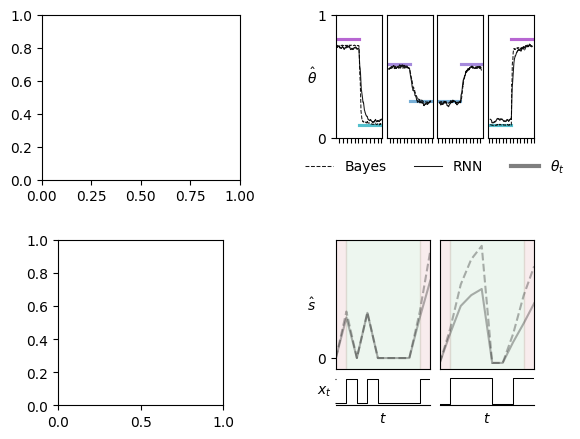

In [13]:
# finish up
# ax_theta.set_xticks([])
# ax_theta.set_yticks([])
# ax_Bs.set_xticks([])
# ax_Bs.set_yticks([])


# make a multicolored legend handle
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
# l4.set_label(r"ground truth $s_t$, $\theta_t$")
# handles.append(l4)

lax = ax_thetax
lax.axis("off")
handles[-1] = Line2D([0], [0], color='k', lw=2*plt.rcParams['lines.linewidth'], c="k", alpha=.5, label=r"$\theta_t$")
lax.legend(handles=handles, loc="center", frameon=False, ncols=3, )
# cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmap), ax=ax_theta, label=r"$\theta$",)

# get cbar axis
# cax = cbar.ax
# cax.set_yticks([0, 1])
# xylabel_to_ticks(cax, which="right")

for ax in axd.values():
    pass
    # ax.margins(x=0.1)
    # ax.relim()
    # ax.autoscale(axis="x", tight=True)

# subfigs[0,0].suptitle(r"$\epsilon^{-1}$")
# subfigs[1,0].suptitle(r"$\lambda^{-1}$")


fig


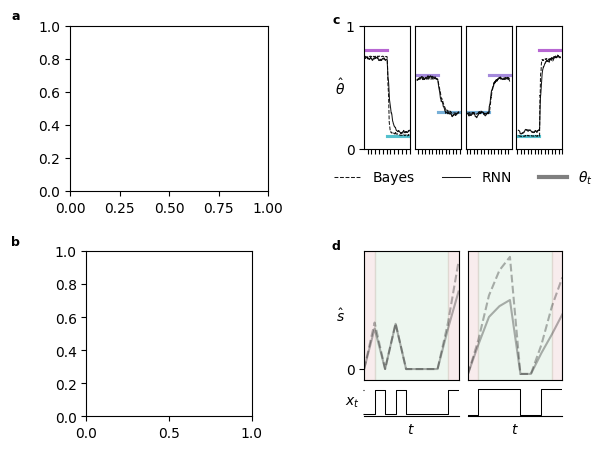

In [14]:
from matplotlib.transforms import blended_transform_factory
from enzyme.plot_helper import add_panel_label
add_panel_label(axd['A'], 'c', x=-0.25, y=1.1, transform=blended_transform_factory(axd['b'].transAxes, axd['A'].transAxes), use_ax_text=True)
add_panel_label(axd['b'], 'd', x=-0.25, y=1.1, transform=blended_transform_factory(axd['b'].transAxes, axd['b'].transAxes), use_ax_text=True)
add_panel_label(axd['0'], 'a', x=-0.25, y=1.1, transform=blended_transform_factory(axd['0'].transAxes, axd['0'].transAxes), use_ax_text=True)
add_panel_label(axd['z'], 'b', x=-0.25, y=1.1, transform=blended_transform_factory(axd['0'].transAxes, axd['z'].transAxes), use_ax_text=True)

fig

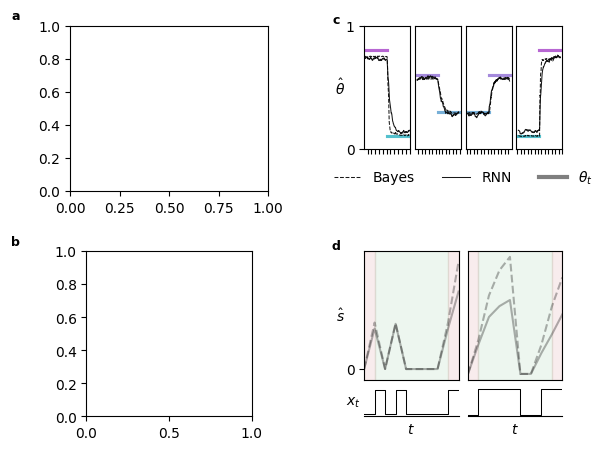

In [15]:
ax_Bs.tick_params(axis="x", which="both", length=2)
ax_sx.tick_params(axis="x", which="both", length=2)
ax_sx.tick_params(axis="y", which="both", length=0)
fig

In [16]:
"""
xylabel_to_ticks(ax_Bs, which="y")
xylabel_to_ticks(ax_theta, which="y")
xylabel_to_ticks(ax_sx, which="x")
xylabel_to_ticks(ax_theta, which="x")
xylabel_to_ticks(ax_Bs, which="x")
"""

'\nxylabel_to_ticks(ax_Bs, which="y")\nxylabel_to_ticks(ax_theta, which="y")\nxylabel_to_ticks(ax_sx, which="x")\nxylabel_to_ticks(ax_theta, which="x")\nxylabel_to_ticks(ax_Bs, which="x")\n'

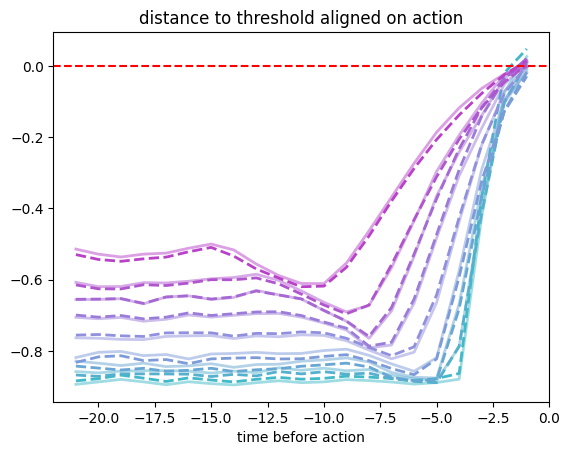

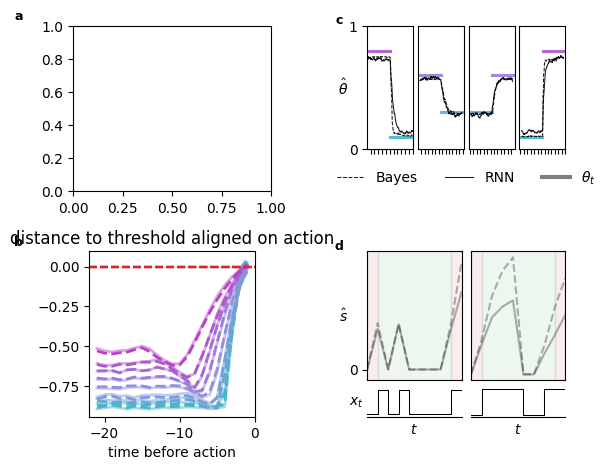

In [17]:
fig_,ax = plt.subplots()
T = len(net_DV[0])//2 + 1
xax = np.arange(-T, 0)
for p_i, p in enumerate(PGO_show):
    ax.plot(xax, bayes_DV[p_i, :T], c = cmap_cool(p), linewidth = 2, linestyle = '--', alpha = 1)
    ax.plot(xax, net_DV[p_i, :T], c = cmap_cool(p), linewidth = 2, alpha = .5)
ax.axhline(0, c = 'r', linestyle = '--')
ax.set_title("distance to threshold aligned on action")
ax.set_xlabel("time before action")
plt.show()

# fig,ax = plt.subplots()
ax = axd['z']  # gets plotted onto the multipanel figure
for p_i, p in enumerate(PGO_show):
    ip = np.where(PGO_show == p)[0][0]
    ax.plot(xax, bayes_DV[p_i, :T], c = cmap_cool(p), linewidth = 2, linestyle = '--')
    ax.plot(xax, net_DV[p_i, :T], c = cmap_cool(p), linewidth = 2, alpha = .5)
    ax.axhline(0, c = 'tab:red', linestyle = '--')
    ax.set_title("distance to threshold aligned on action")
    ax.set_xlabel("time before action")
plt.show()
fig

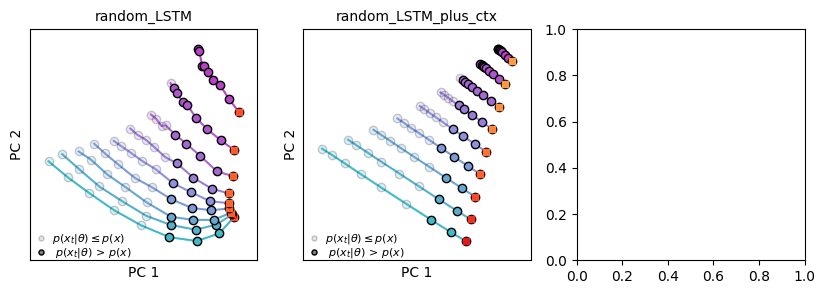

In [18]:
from matplotlib.collections import LineCollection
from matplotlib.lines import Line2D
import matplotlib.cm as cm

key = "action_prob_per_PGO"
names = ["random_LSTM", "random_LSTM_plus_ctx",net_name]
agents =  [plotting_data[names[0]], plotting_data[names[1]],  plotting_data[names[2]]]
act_probs = [agents[2][key].max(), agents[1][key].max(), agents[0][key].max()]
action_max =  max(act_probs)
action_min = min(act_probs)


def plot(ax, data, x_MU, y_MU, x_batch, y_batch, i, x_flip, y_flip):
    for p, PGO in enumerate(PGO_show):
        s_before_act = -9
        act_prob_cmap = cm.ScalarMappable(cmap=action_cmap, norm = cm.colors.Normalize(-.05, .3))       
        all_stim = data["avg_stim_per_PGO"][:, s_before_act:]
        a_s = data["avg_stim_per_PGO"][p][s_before_act:]
        a = data["action_prob_per_PGO"][p]
        x = data["PC1_til_action_per_PGO"][p][s_before_act:] * x_flip
        y = data["PC2_til_action_per_PGO"][p][s_before_act:] * y_flip
        c_act = act_prob_cmap.to_rgba(a.max())
        c_PGO = cmap_cool(PGO)  # only RBG instead of RGBA
        l, = ax.plot(x, y, c = c_PGO, alpha=1.)
        
        for i, (x_, y_, a_s_) in enumerate(zip(x, y, a_s)):
            alpha =  .2 + .8*(a_s_ > all_stim.mean())

            ax.plot([x_], [y_], mfc = (c_PGO, 1.), alpha = alpha, markeredgecolor = 'k', marker="o", )
        ax.plot(x_, y_, color = c_act, marker="s", ls="none", mec=c_act, markersize = 4)

    solid_circle =\
        Line2D([0], [0], linewidth = 0, marker='o', markerfacecolor='gray', markeredgecolor='black', alpha=1)
    faint_circle =\
        Line2D([0], [0], linewidth = 0, marker='o', markerfacecolor='gray', markeredgecolor='black', alpha=0.2)
    ax.legend(                              [faint_circle, solid_circle], 
        [rf"$ p(x_t | \theta) \leq p(x) $", rf" $p(x_t | \theta) $ > $ p(x) $"],
        loc='lower left', 
        fontsize=8,  # Make the font size smaller
        markerscale=.6,    # Scale down the marker size
        handletextpad=0,  # Decrease the space between the marker and the text
        borderpad=-.5,      # Decrease the space between the legend border and the content
        labelspacing=0,   # Decrease the space between the legend entries
        frameon=False, 
        ncols = 1)

fig_, axs = plt.subplots(1, 3, figsize = (10, 3))
axs[-1] = ax_PCA
x_flips = [1, 1, 1]
y_flips = [1, -1, -1]
for j, (ax, data, name, x_flip, y_flip) in enumerate(zip(axs, agents, names, x_flips, y_flips)):
    x_MU, x_SE, x_batch = batch_to_MU_STD(plotting_data, "analytical_rew_rate_points_x_axis", name, batch_num)
    y_MU, y_SE, y_batch = batch_to_MU_STD(plotting_data, "analytical_rew_rate_points_y_axis", name, batch_num)
    plot(ax, data, x_MU, y_MU, x_batch, y_batch, j, x_flip, y_flip)

    
mappable = cm.ScalarMappable(cmap=action_cmap, norm = cm.colors.Normalize(-.05, .3)) 
cbar = fig.colorbar(mappable, ax=axs[-1], orientation='vertical')
cbar.set_ticks([])
cbar.set_label(r"$P(\text{action})$", rotation=0, labelpad=0)
cbar.ax.yaxis.label.set_position((0.5, 1.1)) 

for ax, name in zip(axs, names):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xlabel("PC 1")
    ax.margins(.1, .1)
    ax.set_ylabel("PC 2")
    ax.set_title(name, fontsize = 10)
plt.show()

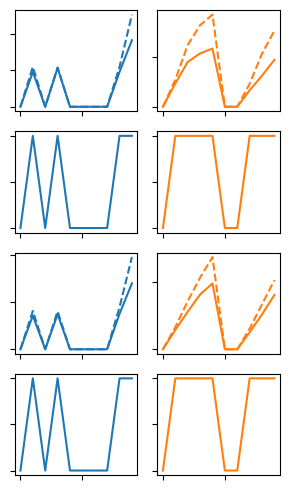

In [19]:
til = 10
data = plotting_data["trained_LSTM_planted"]
PGO_num = data["plantA_GOs"].shape[0]
fig_, ax = plt.subplots(2*PGO_num, 2, tight_layout = True, figsize = (3, 5))

for p in range(PGO_num):
    r1 = 2*p
    r2 = 2*p + 1
    ax[r2, 0].plot(data["plantA_GOs"][:,:til][p], c = 'C0')
    ax[r1, 0].plot(transform(data["plantA_bayes_safe_est"])[:,:til][p], c = 'C0', linestyle = '--')
    ax[r1, 0].plot(transform(plant_A_est)[:,:til][p], c = 'C0')
    ax[r2, 1].plot(data["plantB_GOs"][:,:til][p], c = 'C1')
    ax[r1, 1].plot(transform(data["plantB_bayes_safe_est"])[:,:til][p], c = 'C1', linestyle = '--')
    ax[r1, 1].plot(transform(plant_B_est)[:,:til][p], c = 'C1')
    for i in range(2):
        for j in range(2):
            ax[r1 + i, j].set_xticklabels([])
            ax[r1 + i, j].set_yticklabels([])
plt.show()

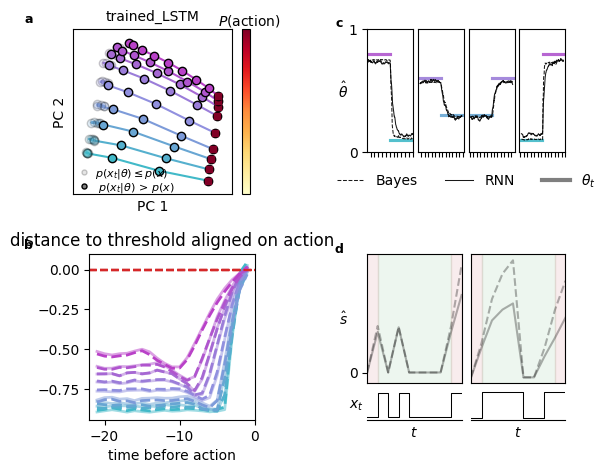

In [20]:
fig

In [21]:
save_plot("_fig_tracking", fig=fig, 
          path=PRJ_ROOT / "tex_REFACTORIZED/figures/",
          file_formats=[
    "svg", 
    "png", 
    "pdf"
])